# Reversed $\Delta \eta_{hh}$ limits

**Goal:** I was *very* curious to see if w/ the $\Delta \eta_{hh}$ cats we
1. Had a SM NR limit close to $1 \sigma$ of the expected one
2. To look at the post fit plots

To check the limits, since I ran each of the years individually and together, I thought it might be nice to just try to aggregate *all* of the information into ONE table, and then maybe try to decide *what* summary plots I want to look at?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
import json
import os

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
idx = pd.MultiIndex.from_product([[16,17,18],[1,2,3,6],[1,2]],
                                 names=['year','deta_hh_bins','SRs'])

In [3]:
cols = pd.MultiIndex.from_product([['just bootstrap','shape only','shape + bootstrap'],
                                   ['obs','$-2 \sigma$','$-1 \sigma$','exp','$1 \sigma$','$2 \sigma$']])

In [4]:
lim = pd.DataFrame(0,idx,cols)
lim

just bootstrap                                         \
                                 obs $-2 \sigma$ $-1 \sigma$ exp $1 \sigma$   
year deta_hh_bins SRs                                                         
16   1            1                0           0           0   0          0   
                  2                0           0           0   0          0   
     2            1                0           0           0   0          0   
                  2                0           0           0   0          0   
     3            1                0           0           0   0          0   
                  2                0           0           0   0          0   
     6            1                0           0           0   0          0   
                  2                0           0           0   0          0   
17   1            1                0           0           0   0          0   
                  2                0           0           0   0          0   
     2            1                0           0           0   0          0   
                  2                0           0           0   0          0   
     3            1                0           0           0   0          0   
                  2                0           0           0   0          0   
     6            1                0           0           0   0          0   
                  2                0           0           0   0          0   
18   1            1                0           0           0   0          0   
                  2                0           0           0   0          0   
     2            1                0           0           0   0          0   
                  2                0           0           0   0          0   
     3            1                0           0           0   0          0   
                  2                0           0           0   0          0   
     6            1                0           0           0   0          0   
                  2                0           0           0   0          0   

                                 shape only                              \
                      $2 \sigma$        obs $-2 \sigma$ $-1 \sigma$ exp   
year deta_hh_bins SRs                                                     
16   1            1            0          0           0           0   0   
                  2            0          0           0           0   0   
     2            1            0          0           0           0   0   
                  2            0          0           0           0   0   
     3            1            0          0           0           0   0   
                  2            0          0           0           0   0   
     6            1            0          0           0           0   0   
                  2            0          0           0           0   0   
17   1            1            0          0           0           0   0   
                  2            0          0           0           0   0   
     2            1            0          0           0           0   0   
                  2            0          0           0           0   0   
     3            1            0          0           0           0   0   
                  2            0          0           0           0   0   
     6            1            0          0           0           0   0   
                  2            0          0           0           0   0   
18   1            1            0          0           0           0   0   
                  2            0          0           0           0   0   
     2            1            0          0           0           0   0   
                  2            0          0           0           0   0   
     3            1            0          0           0           0   0   
                  2            0          0           0           0   0   
     6       

In [6]:
uncorr = pd.DataFrame(0,pd.MultiIndex.from_product([[16,17,18],[1,2,3,6]],names=['year','deta_hh_bins']),cols)

In [8]:
for yr in [16,17,18]:
    for eta_bins in [1,2,3,6]:
        for c,cID in zip(['shape + bootstrap','just bootstrap','shape only'],
                          ['systs-1NP-dEta_hh-cat','stat-only-dEta_hh-cat', 
                           #'stat-only-dEta_hh-cat-noBS',
                           'systs-1NP-noBS-dEta_hh-cat']): 

            fin = f'../stats-results/dEta_cats/lim-{cID}-{yr}-SM-HH-unblind-{eta_bins}_dEta_hh_1SR_rev_dEta.csv'

            try:

                dfi = pd.read_csv(fin)

                i = (yr,eta_bins)

                uncorr.loc[i,c] = dfi.loc[0].values
            except FileNotFoundError:
                print(fin)


../stats-results/dEta_cats/lim-systs-1NP-noBS-dEta_hh-cat-16-SM-HH-unblind-1_dEta_hh_1SR_rev_dEta.csv
../stats-results/dEta_cats/lim-systs-1NP-noBS-dEta_hh-cat-16-SM-HH-unblind-2_dEta_hh_1SR_rev_dEta.csv
../stats-results/dEta_cats/lim-systs-1NP-noBS-dEta_hh-cat-16-SM-HH-unblind-3_dEta_hh_1SR_rev_dEta.csv
../stats-results/dEta_cats/lim-systs-1NP-noBS-dEta_hh-cat-16-SM-HH-unblind-6_dEta_hh_1SR_rev_dEta.csv
../stats-results/dEta_cats/lim-systs-1NP-noBS-dEta_hh-cat-17-SM-HH-unblind-1_dEta_hh_1SR_rev_dEta.csv
../stats-results/dEta_cats/lim-systs-1NP-noBS-dEta_hh-cat-17-SM-HH-unblind-2_dEta_hh_1SR_rev_dEta.csv
../stats-results/dEta_cats/lim-systs-1NP-noBS-dEta_hh-cat-17-SM-HH-unblind-3_dEta_hh_1SR_rev_dEta.csv
../stats-results/dEta_cats/lim-systs-1NP-noBS-dEta_hh-cat-17-SM-HH-unblind-6_dEta_hh_1SR_rev_dEta.csv
../stats-results/dEta_cats/lim-systs-1NP-noBS-dEta_hh-cat-18-SM-HH-unblind-1_dEta_hh_1SR_rev_dEta.csv
../stats-results/dEta_cats/lim-systs-1NP-noBS-dEta_hh-cat-18-SM-HH-unblind-2_dEta_

In [9]:
for yr in [16,17,18]:
    for eta_bins in [1,2,3,6]:
        for nSR in [1,2]:
            for c,cID in zip(['shape + bootstrap','just bootstrap','shape only'],
                              ['systs-1NP-dEta_hh-cat-corr','stat-only-dEta_hh-cat', 
                               #'stat-only-dEta_hh-cat-noBS',
                               'systs-1NP-noBS-dEta_hh-cat-corr']): 
               
                fin = f'../stats-results/dEta_cats/lim-{cID}-{yr}-SM-HH-unblind-{eta_bins}_dEta_hh_{nSR}SR_rev_dEta.csv'
                    
                try:
                
                    dfi = pd.read_csv(fin)

                    i = (yr,eta_bins,nSR)

                    lim.loc[i,c] = dfi.loc[0].values
                except FileNotFoundError:
                    print(fin)
            

In [6]:
f'../stats-results/dEta_cats/ws-systs-1NP-dEta_hh-cat-corr-18-SM-HH-unblind-1_dEta_hh_1SR_rev_dEta.json'

'../stats-results/dEta_cats/ws-systs-1NP-dEta_hh-cat-corr-18-SM-HH-unblind-1_dEta_hh_1SR_rev_dEta.json'

In [7]:
lim.round(2)

just bootstrap                                  \
                                 obs $-2 \sigma$ $-1 \sigma$     exp   
year deta_hh_bins SRs                                                  
16   1            1            68.47       69.04       92.79  129.03   
                  2            60.03       62.01       83.40  116.08   
     2            1            61.71       55.93       75.24  104.77   
                  2            53.47       51.14       68.84   95.97   
     3            1            51.21       50.06       67.39   93.94   
                  2            45.64       46.09       62.10   86.69   
     6            1            48.12       44.80       60.37   84.29   
                  2            42.94       41.29       55.71   77.92   
17   1            1            53.27       51.65       69.42   96.53   
                  2            49.84       47.28       63.58   88.48   
     2            1            43.41       44.43       59.75   83.15   
                  2            40.52       40.89       55.01   76.62   
     3            1            39.38       40.30       54.21   75.50   
                  2            36.52       37.25       50.14   69.89   
     6            1            36.88       36.92       49.71   69.30   
                  2            33.76       34.15       46.00   64.20   
18   1            1            67.04       51.01       68.50   95.13   
                  2            57.68       44.23       59.43   82.61   
     2            1            52.30       41.75       56.10   77.96   
                  2            46.18       37.06       49.81   69.30   
     3            1            51.63       37.34       50.18   69.78   
                  2            45.44       33.60       45.18   62.89   
     6            1            34.80       32.58       43.81   60.98   
                  2            31.07       29.77       40.06   55.83   

                                            shape only              \
                      $1 \sigma$ $2 \sigma$        obs $-2 \sigma$   
year deta_hh_bins SRs                                                
16   1            1       180.01     242.08      57.75       60.49   
                  2       162.17     218.44      55.50       58.03   
     2            1       146.44     197.39      53.66       51.39   
                  2       134.34     181.40      50.05       49.11   
     3            1       131.50     177.57      46.59       46.96   
                  2       121.55     164.46      44.11       44.69   
     6            1       118.24     160.06      49.11       43.75   
                  2       109.55     148.67      45.06       40.95   
17   1            1       134.68     181.14      46.90       47.66   
                  2       123.56     166.38      47.02       45.49   
     2            1       116.11     156.35      40.95       42.18   
                  2       107.12     144.42      40.31       40.13   
     3            1       105.54     142.28      35.81       38.84   
                  2        97.82     132.07      34.82       36.67   
     6            1        97.01     131.00      37.32       37.66   
                  2        90.02     121.78      34.29       34.86   
18   1            1       132.48     177.78      66.89       41.29   
                  2       115.18     154.80      65.57       39.91   
     2            1       108.68     146.02      67.13       38.13   
                  2        96.72     130.16      63.51       36.49   
     3            1        97.34     130.92      80.37       38.03   
                  2        87.86     118.35      73.29       35.97   
     6            1        85.18     114.75      76.23       37.83   
                  2        78.12     105.44      66.52       34.73   

                                                                 \
                      $-1 \sigma$     exp $1 \sigma$ $2 \sigma$   
year deta_hh_bins SRs                               

In [8]:
lim.loc[([16,17,18],[1,2,3,6],1),'just bootstrap']

obs  $-2 \sigma$  $-1 \sigma$      exp  $1 \sigma$  \
year deta_hh_bins SRs                                                          
16   1            1    68.472       69.035       92.788  129.032     180.006   
     2            1    61.710       55.928       75.237  104.772     146.442   
     3            1    51.211       50.059       67.390   93.943     131.503   
     6            1    48.123       44.798       60.370   84.289     118.240   
17   1            1    53.267       51.646       69.416   96.534     134.680   
     2            1    43.412       44.434       59.747   83.146     116.114   
     3            1    39.381       40.296       54.210   75.495     105.539   
     6            1    36.877       36.925       49.708   69.296      97.008   
18   1            1    67.044       51.008       68.498   95.133     132.482   
     2            1    52.297       41.753       56.095   77.962     108.679   
     3            1    51.626       37.335       50.177   69.776      97.344   
     6            1    34.802       32.575       43.807   60.977      85.185   

                       $2 \sigma$  
year deta_hh_bins SRs              
16   1            1       242.076  
     2            1       197.391  
     3            1       177.569  
     6            1       160.056  
17   1            1       181.136  
     2            1       156.348  
     3            1       142.285  
     6            1       131.000  
18   1            1       177.784  
     2            1       146.022  
     3            1       130.917  
     6            1       114.752

**First off, let's *just* make the rev $\Delta \eta_{hh}$ plots**

In [10]:
deta = '$\Delta \eta_{hh}$'

xlabels = [f'20{yr}: {bi} {deta} bin' if bi == 1 else f'{bi} {deta} bins' 
           for yr,bi in product([16,17,18],[1,2,3,6])]

In [11]:
text = "$\mathbf{ATLAS}$ Data Internal\n"
text += "min_dR, res bkts, SR (124,117)\n"
text += "Reversed $\Delta \eta_{hh}$ validation region"

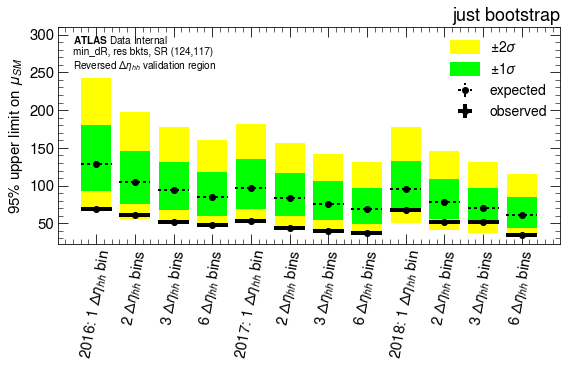

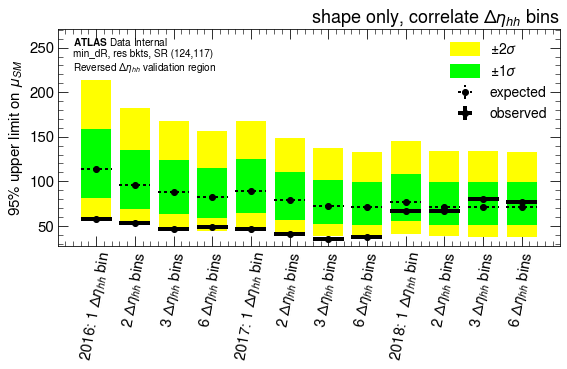

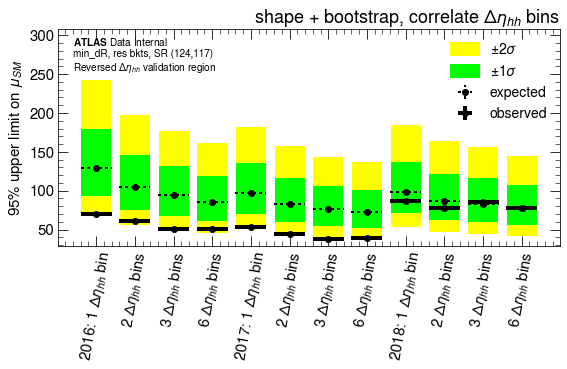

In [11]:
for c,tag in zip(['just bootstrap','shape only','shape + bootstrap'],['bs','shape','shape_bs']):
    
    plt.figure(figsize=(9,4))
    
    dfi = lim.loc[([16,17,18],[1,2,3,6],1),c]
    
    two_sigma = np.vstack([dfi['exp']- dfi['$-2 \sigma$'], dfi['$2 \sigma$']-dfi['exp']])
    one_sigma = np.vstack([dfi['exp']- dfi['$-1 \sigma$'], dfi['$1 \sigma$']-dfi['exp']])
    
    plt.errorbar(range(len(dfi.index)), dfi.exp, two_sigma , color='yellow',
                 lw=0,elinewidth=30,label=r'$\pm 2 \sigma$')
    plt.errorbar(range(len(dfi)), dfi.exp, one_sigma ,color='lime',
                 lw=0,elinewidth=30,label=r'$\pm 1 \sigma$')
        
    eb0 = plt.errorbar(range(len(dfi.index)), dfi.exp, 0, .4, marker='o',color='k',lw=0,
                       elinewidth=2,label='expected')
    eb0[-1][0].set_linestyle('dotted')
    plt.errorbar(range(len(dfi.index)), dfi.obs, 0, .4, marker='o',color='k',lw=0,
                 elinewidth=4,label='observed')
        
    plt.legend(loc='upper right')
    plt.xticks(range(len(dfi.index)),xlabels,rotation=80)
    plt.ylabel('95% upper limit on $\mu_{SM}$')
    plt.title(c+', correlate $\Delta \eta_{hh}$ bins' if 'shape' in c else c,loc='right')
    
    
    ymin,ymax = plt.ylim()
    plt.ylim(ymin,ymax + .25*(ymax-ymin))
    
    ax = plt.gca()
    plt.text(0.03,0.97,text,ha='left',va='top',transform=ax.transAxes,fontsize=10)
    
    plt.savefig(f'figures/fullRun2/lim_rev_deta_hh_{tag}.pdf',bbox_inches='tight')

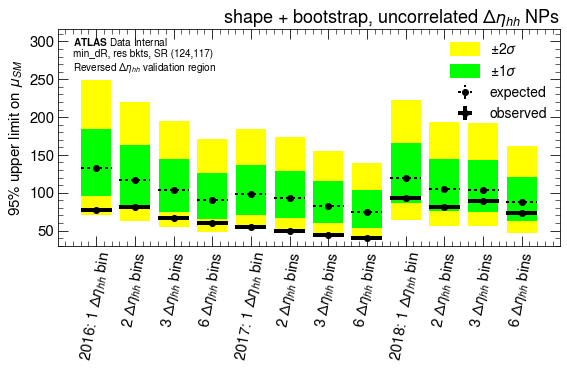

In [13]:
c = 'shape + bootstrap'
tag = 'shape_bs'

plt.figure(figsize=(9,4))

dfi = uncorr.loc[([16,17,18],[1,2,3,6]),c]

two_sigma = np.vstack([dfi['exp']- dfi['$-2 \sigma$'], dfi['$2 \sigma$']-dfi['exp']])
one_sigma = np.vstack([dfi['exp']- dfi['$-1 \sigma$'], dfi['$1 \sigma$']-dfi['exp']])

plt.errorbar(range(len(dfi.index)), dfi.exp, two_sigma , color='yellow',
             lw=0,elinewidth=30,label=r'$\pm 2 \sigma$')
plt.errorbar(range(len(dfi)), dfi.exp, one_sigma ,color='lime',
             lw=0,elinewidth=30,label=r'$\pm 1 \sigma$')

eb0 = plt.errorbar(range(len(dfi.index)), dfi.exp, 0, .4, marker='o',color='k',lw=0,
                   elinewidth=2,label='expected')
eb0[-1][0].set_linestyle('dotted')
plt.errorbar(range(len(dfi.index)), dfi.obs, 0, .4, marker='o',color='k',lw=0,
             elinewidth=4,label='observed')

plt.legend(loc='upper right')
plt.xticks(range(len(dfi.index)),xlabels,rotation=80)
plt.ylabel('95% upper limit on $\mu_{SM}$')
plt.title(c+', uncorrelated $\Delta \eta_{hh}$ NPs' if 'shape' in c else c,loc='right')


ymin,ymax = plt.ylim()
plt.ylim(ymin,ymax + .25*(ymax-ymin))

ax = plt.gca()
plt.text(0.03,0.97,text,ha='left',va='top',transform=ax.transAxes,fontsize=10)

plt.savefig(f'figures/fullRun2/lim_rev_deta_hh_uncorrNPs_{tag}.pdf',bbox_inches='tight')

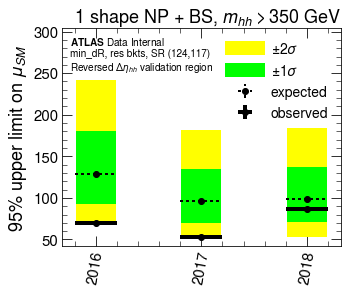

In [24]:
c = 'shape + bootstrap'
tag = 'shape_bs'
    
plt.figure(figsize=(5,4))

dfi = lim.loc[([16,17,18],[1],1),c]

two_sigma = np.vstack([dfi['exp']- dfi['$-2 \sigma$'], dfi['$2 \sigma$']-dfi['exp']])
one_sigma = np.vstack([dfi['exp']- dfi['$-1 \sigma$'], dfi['$1 \sigma$']-dfi['exp']])

plt.errorbar(range(len(dfi.index)), dfi.exp, two_sigma , color='yellow',
             lw=0,elinewidth=40,label=r'$\pm 2 \sigma$')
plt.errorbar(range(len(dfi)), dfi.exp, one_sigma ,color='lime',
             lw=0,elinewidth=40,label=r'$\pm 1 \sigma$')

eb0 = plt.errorbar(range(len(dfi.index)), dfi.exp, 0, .2, marker='o',color='k',lw=0,
                   elinewidth=2,label='expected')
eb0[-1][0].set_linestyle('dotted')
plt.errorbar(range(len(dfi.index)), dfi.obs, 0, .2, marker='o',color='k',lw=0,
             elinewidth=4,label='observed')

plt.legend(loc='upper right')
plt.xticks(range(3),['2016','2017','2018'],rotation=80)
plt.ylabel('95% upper limit on $\mu_{SM}$',fontsize=18)
plt.title('1 shape NP + BS, $m_{hh} > 350$ GeV',loc='right')


ymin,ymax = plt.ylim()
plt.ylim(ymin,ymax + .25*(ymax-ymin))

ax = plt.gca()
plt.text(0.03,0.97,text,ha='left',va='top',transform=ax.transAxes,fontsize=10)

plt.savefig(f'figures/fullRun2/lim_rev_inc_m_hh_gt_350_{tag}.pdf',bbox_inches='tight')

**Take away message:** Rn, we *need* more flexibility in the fit **dont' correlate the NPs**!!!

**While I'm at it, make for SRin/out too!!**

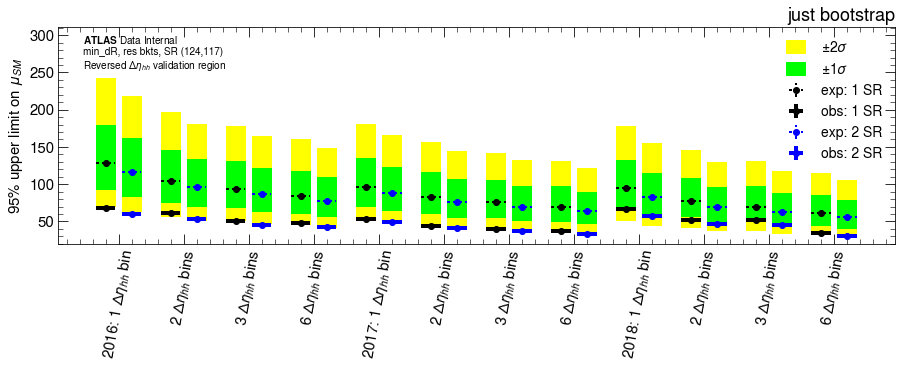

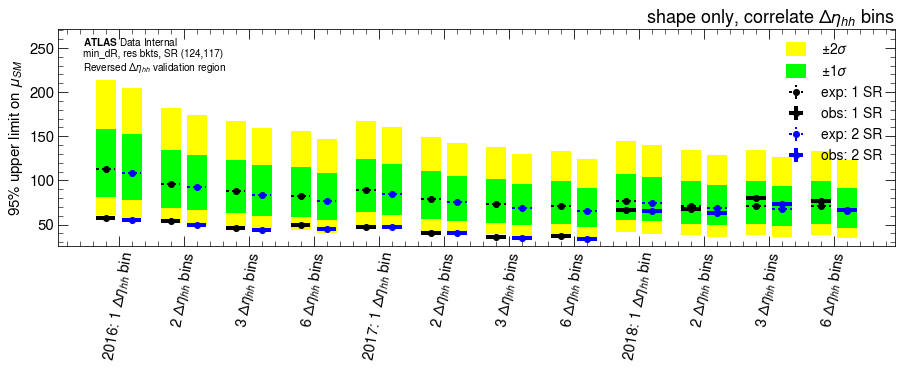

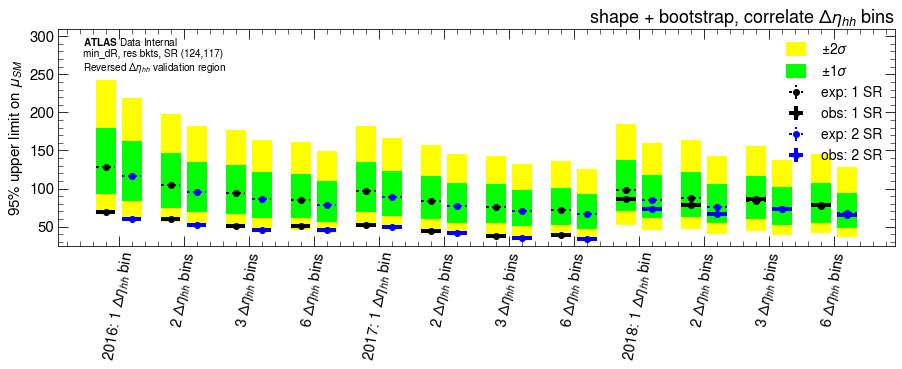

In [166]:
for c,tag in zip(['just bootstrap','shape only','shape + bootstrap'],['bs','shape','shape_bs']):
    
    plt.figure(figsize=(15,4))
    
    for nSR,color,eps in zip([1,2],['k','b'],[-.2,+.2]):
        
        dfi = lim.loc[([16,17,18],[1,2,3,6],nSR),c]

        two_sigma = np.vstack([dfi['exp']- dfi['$-2 \sigma$'], dfi['$2 \sigma$']-dfi['exp']])
        one_sigma = np.vstack([dfi['exp']- dfi['$-1 \sigma$'], dfi['$1 \sigma$']-dfi['exp']])

        plt.errorbar(eps+np.arange(len(dfi)), dfi.exp, two_sigma , color='yellow',
                     lw=0,elinewidth=20,label=r'$\pm 2 \sigma$' if color=='k' else None)
        plt.errorbar(eps+np.arange(len(dfi)), dfi.exp, one_sigma ,color='lime',
                     lw=0,elinewidth=20,label=r'$\pm 1 \sigma$' if color=='k' else None)

        eb0 = plt.errorbar(eps+np.arange(len(dfi)), dfi.exp, 0, .15, marker='o',color=color,lw=0,
                           elinewidth=2,label=f'exp: {nSR} SR')
        eb0[-1][0].set_linestyle('dotted')
        plt.errorbar(eps+np.arange(len(dfi)), dfi.obs, 0, .15, marker='o',color=color,lw=0,
                     elinewidth=4,label=f'obs: {nSR} SR')
        
    plt.legend(loc='upper right')
    plt.xticks(range(len(dfi.index)),xlabels,rotation=80)
    plt.ylabel('95% upper limit on $\mu_{SM}$')
    plt.title(c+', correlate $\Delta \eta_{hh}$ bins' if 'shape' in c else c,loc='right')
    
    
    ymin,ymax = plt.ylim()
    plt.ylim(ymin,ymax + .25*(ymax-ymin))
    
    ax = plt.gca()
    plt.text(0.03,0.97,text,ha='left',va='top',transform=ax.transAxes,fontsize=10)
    
    plt.savefig(f'figures/fullRun2/lim_rev_deta_hh_{tag}_2SRs.pdf',bbox_inches='tight')

If I have some different options for correlating the NPs - maybe worth while to make some summary plot with the central values for these options overlaid with hallow markers for the 4b result and

## Nominal limits

I know *maybe* it would be better to have a separate nb, but I'll j put it here for now haha.

In [183]:
idx = pd.MultiIndex.from_product([[16,17,18,'16-17-18'],[1,2,3,6],[1,2]],
                                 names=['year','deta_hh_bins','SRs'])

cols = pd.MultiIndex.from_product([['just bootstrap','shape + bootstrap'],
                                   ['obs','$-2 \sigma$','$-1 \sigma$','exp','$1 \sigma$','$2 \sigma$']])

nom = pd.DataFrame(0,idx,cols)
nom

just bootstrap                              \
                                     obs $-2 \sigma$ $-1 \sigma$ exp   
year     deta_hh_bins SRs                                              
16       1            1                0           0           0   0   
                      2                0           0           0   0   
         2            1                0           0           0   0   
                      2                0           0           0   0   
         3            1                0           0           0   0   
                      2                0           0           0   0   
         6            1                0           0           0   0   
                      2                0           0           0   0   
17       1            1                0           0           0   0   
                      2                0           0           0   0   
         2            1                0           0           0   0   
                      2                0           0           0   0   
         3            1                0           0           0   0   
                      2                0           0           0   0   
         6            1                0           0           0   0   
                      2                0           0           0   0   
18       1            1                0           0           0   0   
                      2                0           0           0   0   
         2            1                0           0           0   0   
                      2                0           0           0   0   
         3            1                0           0           0   0   
                      2                0           0           0   0   
         6            1                0           0           0   0   
                      2                0           0           0   0   
16-17-18 1            1                0           0           0   0   
                      2                0           0           0   0   
         2            1                0           0           0   0   
                      2                0           0           0   0   
         3            1                0           0           0   0   
                      2                0           0           0   0   
         6            1                0           0           0   0   
                      2                0           0           0   0   

                                                shape + bootstrap              \
                          $1 \sigma$ $2 \sigma$               obs $-2 \sigma$   
year     deta_hh_bins SRs                                                       
16       1            1            0          0                 0           0   
                      2            0          0                 0           0   
         2            1            0          0                 0           0   
                      2            0          0                 0           0   
         3            1            0          0                 0           0   
                      2            0          0                 0           0   
         6            1            0          0                 0           0   
                      2            0          0                 0           0   
17       1            1            0          0                 0           0   
                      2            0          0                 0           0   
         2            1            0          0                 0           0   
                      2            0          0                 0           0   
         3            1            0          0                 0           0   
                      2            0          0                 0           0   
         6            1            0          0                 0           0   
                      2            0          0

In [184]:
for yr in [16,17,18,'16-17-18']:
    for eta_bins in [1,2,3,6]:
        for nSR in [1,2]:
            for c,cID in zip(['just bootstrap','shape + bootstrap'], ['stat-only','systs-1NP-dEta_hh-cat-corr']): 
               
                fin = f'../stats-results/dEta_cats/lim-{cID}-{yr}-SM-HH-{eta_bins}_dEta_hh_{nSR}SR.csv'
                    
                try:
                
                    dfi = pd.read_csv(fin)

                    i = (yr,eta_bins,nSR)

                    nom.loc[i,c] = dfi.loc[0].values
                except FileNotFoundError:
                    print(fin)
            

../stats-results/dEta_cats/lim-stat-only-16-SM-HH-1_dEta_hh_1SR.csv
../stats-results/dEta_cats/lim-stat-only-16-SM-HH-1_dEta_hh_2SR.csv
../stats-results/dEta_cats/lim-stat-only-16-SM-HH-2_dEta_hh_1SR.csv
../stats-results/dEta_cats/lim-stat-only-16-SM-HH-2_dEta_hh_2SR.csv
../stats-results/dEta_cats/lim-stat-only-16-SM-HH-3_dEta_hh_1SR.csv
../stats-results/dEta_cats/lim-stat-only-16-SM-HH-3_dEta_hh_2SR.csv
../stats-results/dEta_cats/lim-stat-only-16-SM-HH-6_dEta_hh_1SR.csv
../stats-results/dEta_cats/lim-stat-only-16-SM-HH-6_dEta_hh_2SR.csv
../stats-results/dEta_cats/lim-stat-only-17-SM-HH-1_dEta_hh_1SR.csv
../stats-results/dEta_cats/lim-stat-only-17-SM-HH-1_dEta_hh_2SR.csv
../stats-results/dEta_cats/lim-stat-only-17-SM-HH-2_dEta_hh_1SR.csv
../stats-results/dEta_cats/lim-stat-only-17-SM-HH-2_dEta_hh_2SR.csv
../stats-results/dEta_cats/lim-stat-only-17-SM-HH-3_dEta_hh_1SR.csv
../stats-results/dEta_cats/lim-stat-only-17-SM-HH-3_dEta_hh_2SR.csv
../stats-results/dEta_cats/lim-stat-only-17-SM-H

In [187]:
nom.loc[('16-17-18'),('shape + bootstrap',['$-2 \sigma$','$-1 \sigma$','exp','$1 \sigma$','$2 \sigma$'])]

shape + bootstrap                                         
                       $-2 \sigma$ $-1 \sigma$    exp $1 \sigma$ $2 \sigma$
deta_hh_bins SRs                                                           
1            1               3.872       5.203  7.234     10.087     13.562
             2               3.400       4.571  6.361      8.880     11.958
2            1               3.388       4.555  6.339      8.850     11.919
             2               3.053       4.107  5.722      7.999     10.784
3            1               3.279       4.409  6.138      8.573     11.549
             2               2.979       4.008  5.585      7.812     10.536
6            1               3.169       4.262  5.935      8.292     11.171
             2               0.000       0.000  0.000      0.000      0.000

**Finally** Load in a some workspaces and make a plots of the intput histograms

In [38]:
with open('../stats-results/dEta_cats/ws-systs-1NP-dEta_hh-cat-corr-16-17-18-SM-HH-unblind-3_dEta_hh_1SR_rev_dEta.json') as f:
    ws = json.load(f)

In [29]:
e = np.linspace(350,1200,35)
xx = 0.5*(e[1:]+e[:-1])

In [44]:
ws['observations'][k]

{'name': 'channel18cat_4b_2',
 'data': [23.0,
  49.0,
  51.0,
  88.0,
  76.0,
  71.0,
  87.0,
  99.0,
  82.0,
  72.0,
  82.0,
  62.0,
  60.0,
  61.0,
  51.0,
  48.0,
  44.0,
  30.0,
  33.0,
  22.0,
  29.0,
  27.0,
  24.0,
  19.0,
  20.0,
  15.0,
  15.0,
  10.0,
  8.0,
  8.0,
  8.0,
  9.0,
  12.0,
  5.0]}

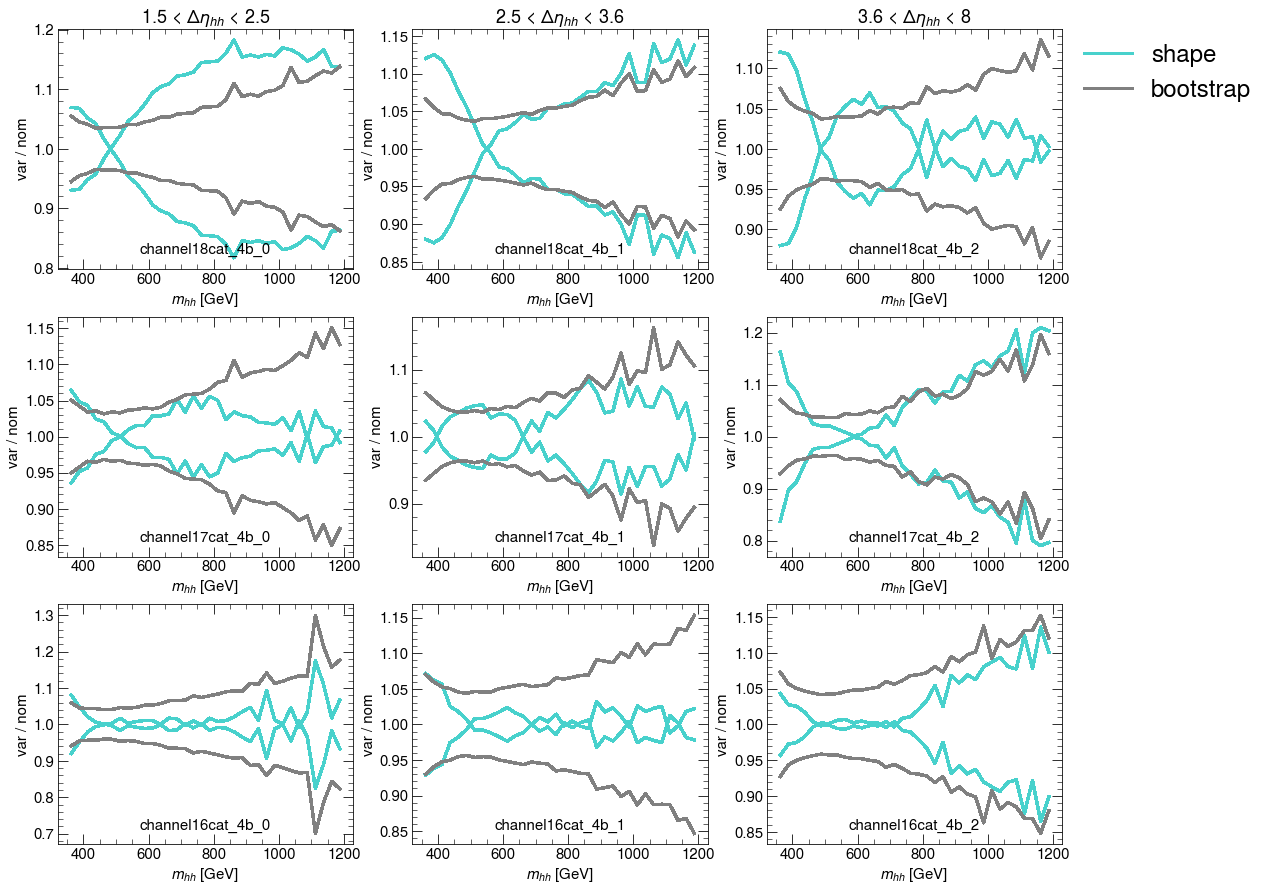

In [50]:
fig,axes = plt.subplots(3,3,figsize=(18,15))

deta_titles = [
    '1.5 < $\Delta \eta_{hh}$ < 2.5',
    '2.5 < $\Delta \eta_{hh}$ < 3.6',
    '3.6 < $\Delta \eta_{hh}$ < 8'
]

for i,ax_row,yr in zip(range(3),axes[::-1],[16,17,18]):
    
    for j,ax,title in zip(range(3),ax_row,deta_titles):
            
        if i == 2:
            ax.set_title(title)
        
        k = i*3+j
        
        #for ws, c,l in zip([ws_in],['darkturquoise','C3'],['inc','excl']):
             
        bkg = ws['channels'][k]['samples'][1]
        assert bkg['name']  == f'background{yr}cat_4b_{j}'

        obs = np.array(ws['observations'][k]['data'])
        
        nom = np.array(bkg['data'])
        
        syst = bkg['modifiers'][1]
        c='mediumturquoise'
        #for syst,ls,ht_reg in zip([low_HT,high_HT],['--','-'],['low','high']):

        ax.plot(xx,np.array(syst['data']['lo_data'])/nom,color=c,label=f'shape')
        ax.plot(xx,np.array(syst['data']['hi_data'])/nom,color=c)
        
        bs = np.array(bkg['modifiers'][0]['data'])
         
        #ax.errorbar(xx,obs / nom,np.sqrt(obs)/nom,color='k',lw=0,elinewidth=4)
            
        ax.plot(xx,1+bs/nom,color='grey',label=f'bootstrap')
        ax.plot(xx,1-bs/nom,color='grey')
        
        ax.set_xlabel('$m_{hh}$ [GeV]')
        ax.set_ylabel('var / nom')
        ax.text(.5,.05,ws['channels'][k]['name'],ha='center',va='bottom',transform=ax.transAxes)
        
axes[0,-1].legend(fontsize=24,bbox_to_anchor=(1,1.03))
 
plt.savefig(f'figures/fullRun2/bmods_rev_deta_hh.pdf',bbox_inches='tight')
    
plt.show()

16 3452.3666653789332
17 4328.532304134423
18 7889.965453876273


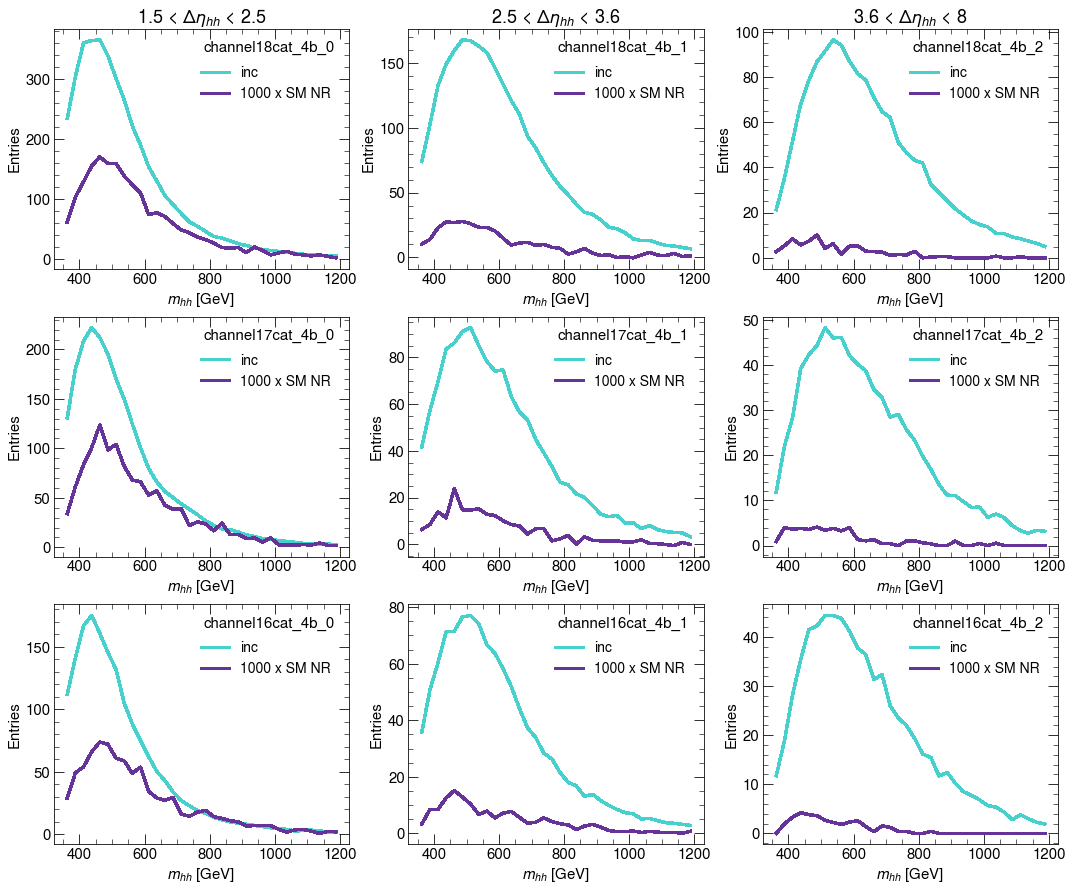

In [51]:
fig,axes = plt.subplots(3,3,figsize=(18,15))

for i,ax_row,yr in zip(range(3),axes[::-1],[16,17,18]):
    
    b_tot = 0
    
    
    for j,ax,title in zip(range(3),ax_row,deta_titles):
            
        if i == 2:
            ax.set_title(title)
        
        k = i*3+j
                
        # Draw the backgrounds
            

        bkg = ws['channels'][k]['samples'][1]
        assert bkg['name']  == f'background{yr}cat_4b_{j}'

        nom = bkg['data']

        b_tot += sum(nom)

        ax.plot(xx,nom,c,label=l)

        # Overlay the signal
        sig = ws['channels'][k]['samples'][0]
        assert sig['name']  == f'signal{yr}cat_4b_{j}'

        s_hist = sig['data']

        scale = 1000
        ax.plot(xx,scale * np.array(s_hist),'rebeccapurple',label=f'{scale} x SM NR')
        
        
        ax.set_xlabel('$m_{hh}$ [GeV]')
        ax.set_ylabel('Entries')
        ax.legend(loc='upper right',bbox_to_anchor=(.98,.9))
        
        ax.text(.95,.95,ws['channels'][k]['name'],ha='right',va='top',transform=ax.transAxes)

    print(yr,b_tot)
    
plt.savefig(f'figures/fullRun2/s_b_hists_cf_incl_vs_excl_rw.pdf',bbox_inches='tight')       
plt.show()